In [47]:
from tod import CSV_Reader, WormViewer
import cv2
import numpy as np

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,8)

from matplotlib import animation, rc
from IPython.display import HTML
from IPython.display import Video

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/Users/paolobifulco/Lab_Work/dev/TOD/tod.py:121: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(start > stop, "Invalid scan and first params.")


In [48]:
def draw_from_output(img, outputs, col=(255,255,0), text=None):
    """ Img is cv2.imread(img) and outputs are (x1, y1, x2, y2, conf, cls_conf)
    Returns the image with all the boudning boxes drawn on the img """
    for output in outputs:
        # output = [float(n) for n in output]
        x1, y1, w, h= output
        x1, y1, x2, y2 = int(x1), int(y1), int(x1 + w), int(y1 + h)
        cv2.rectangle(img, (x1,y1), (x2,y2), col, 2)

        if text is not None:
            cv2.putText(img, f"{round(float(conf), 3) : }{text}",
                        (x1, y1-10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, col, 2)

            
# Helper Functions
def get_worms(image, bbs):
    """ Takes image and list of bbs and returns a list of the
    cutouts for each worm"""
    worms = []
    for bb in bbs:
        bb = bb.astype(int)
        x, y, w, h = bb
        worm = image[y:y+h, x:x+w]
        worms.append(worm)
    
    return worms


def display_worms(worms: list[np.ndarray]):
    """List of worm images and then makes a figure with all
    the worms"""
    worm_count = len(worms)
    fig = plt.figure()
    
    for i in range(worm_count):
        fig.add_subplot(1, worm_count, i + 1)
        plt.imshow(worms[i])
    
    plt.show(block=True)

In [49]:
csv_path = "./data/1046.csv"
vid_path = "./data/1046.avi"

processer = CSV_Reader(csv_path, vid_path)
frame, bbs = processer.get_worms_from_frame(2400)
results = processer.get_worms_from_end(2400, 20)

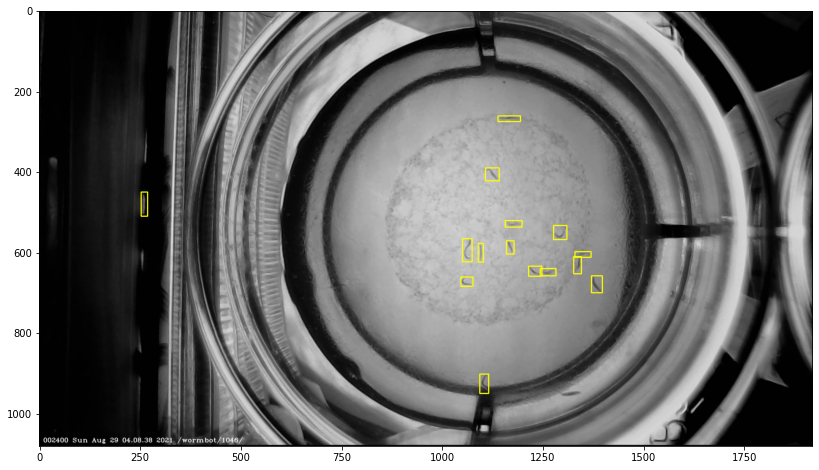

In [50]:
plt.figure(figsize=(20,8))

last = frame.copy()
draw_from_output(last, processer.tracked)
plt.imshow(last)

## Above shows the tracked frame.
___It's done by getting all detections for last 20 frames and then doing nms to isolate unique___

Next will itterate through the frames in reverse and will analyze the dedicated bounding box in each frame.

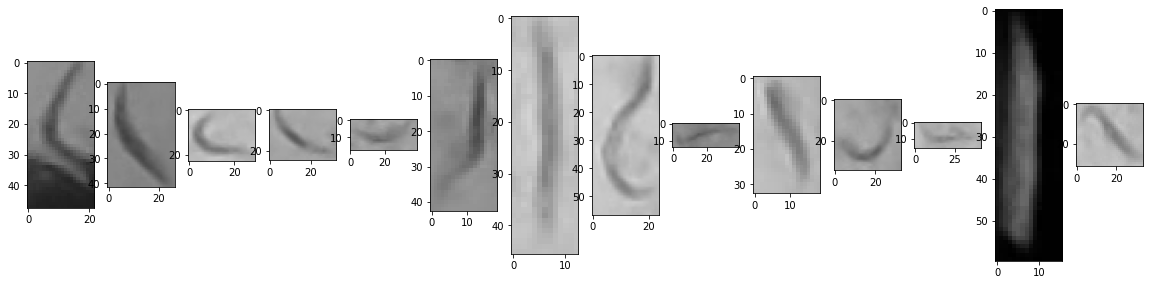

15

In [51]:
viewer = WormViewer(csv_path, vid_path, first=2400)
worms = viewer.fetch_worms(np.arange(0, 14, 1), 2400)
display_worms(worms)
len(viewer.tracked)

In [52]:
# Make worm video by worm id if video is true.
video = False

if video == True:
    for i in range(len(viewer.tracked)):
        viewer.create_worm_video(i, 1000)
        
# viewer.create_worm_video(2, 2000)

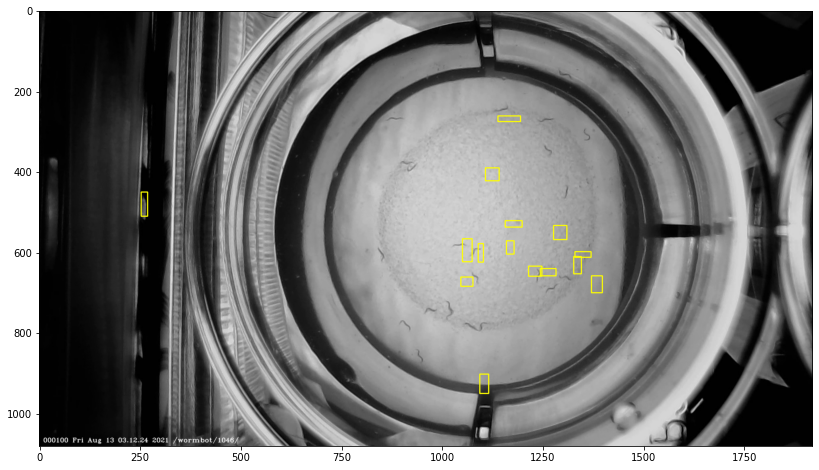

In [53]:
_, t = processer.get_frame(100)
draw_from_output(t, processer.tracked)
plt.imshow(t)

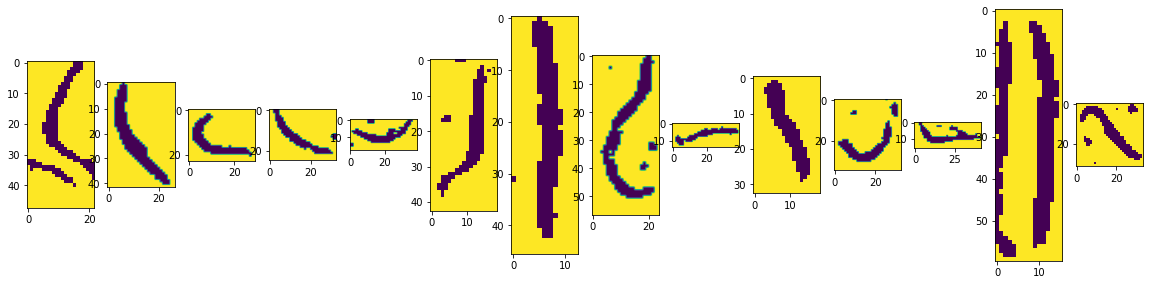

In [54]:
transformed = viewer.transform_all_worms(worms)
display_worms(transformed)

In [64]:
viewer.compute_score()

(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(1, 15)
(2, 15)
(3, 15)
(4, 15)
(5, 15)
(6, 15)
(7, 15)
(8, 15)
(9, 15)
(10, 15)
(11, 15)
(12, 15)
(13, 15)
(14, 15)
(15, 15)
(15, 15)
(15, 15)
(15, 15)
(15, 15)
(15, 15)
(15, 15)
(15, 15)


KeyboardInterrupt: 